출처: https://hu-nie.tistory.com/entry/DICOM%EC%9D%98-%EB%AA%A8%EB%93%A0-%EA%B2%83-1

를 보고 DICOM에 대한 정리와 캐글 코드를 보고 작성한 노트북

## DICOM 이란? 
DICOM(Digital Imaging and Communications in Medicine): 의료 영상에서 정보를 처리, 저장, 인쇄 및 전송하기 위한 표준, 해당 데이터는 파일 형식 정의와 네트워크 통신 프로토콜이 포함

- DICOM파일은 DICOM형식으로 이미지와 환자 데이터를 수신할 수 있는 두 엔티티간에 교환할 수 있음
- DICOM 표준을 따르는 파일의 확장자는 .dcm을 사용


## DICOM File Format
DICOM의 파일 구조는 크게 두가지 영역으로 구성된다. (File Meta Information + Object Instance or Informamtion Object)

아래는 DICOM의 파일 구조
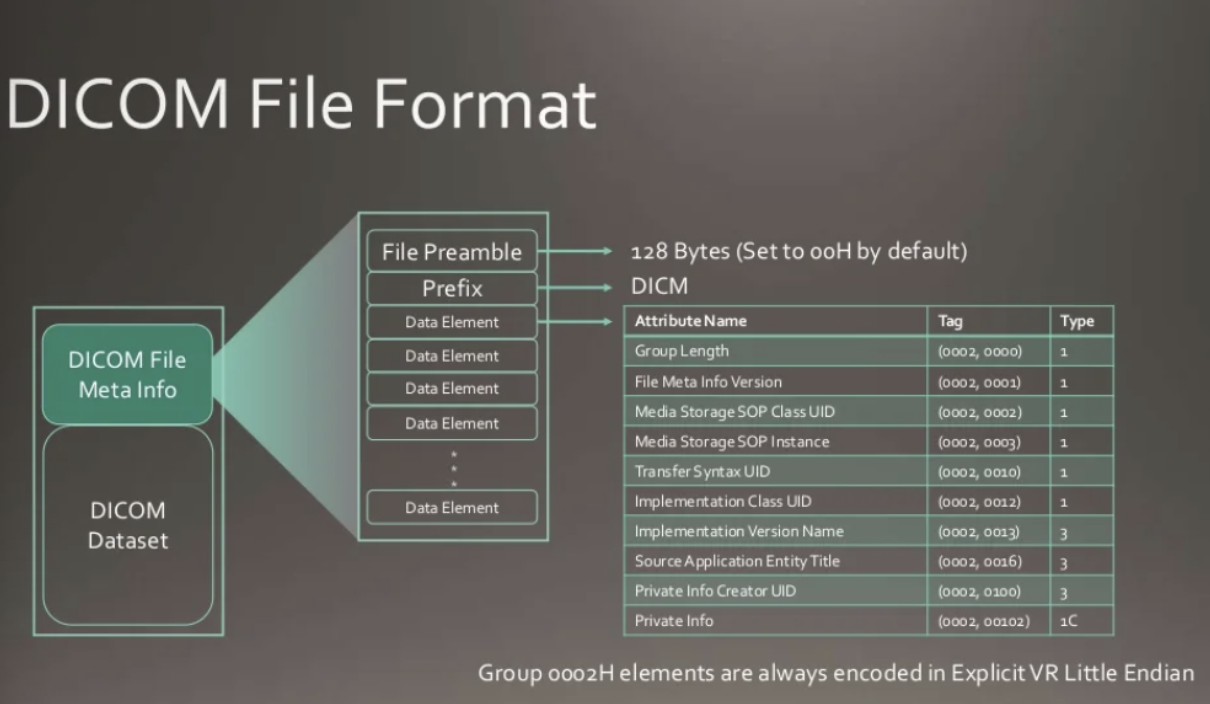 

A. File Meta Information
- File Preamble: 128byte로 구성된 더미 바이트로 주요 구성은 0 값으로 구성되어 있지만, 필요시 특별한 정보를 담을 수 있음.
- DICOM Prefix: DICOM의 정체성을 나타내는 영역. Preamble 이후에  4byte는 "D","I","C","M"을 뜻하는 Char(4)가 와야함.
- File Meta Elements: DICOM파일 형식의 파일 메타 정보 형식을 지원하는데 필요항 파일 메타 요소를 지정
- Information object: 이미지/영상 데이터

아래는 File meta Elements
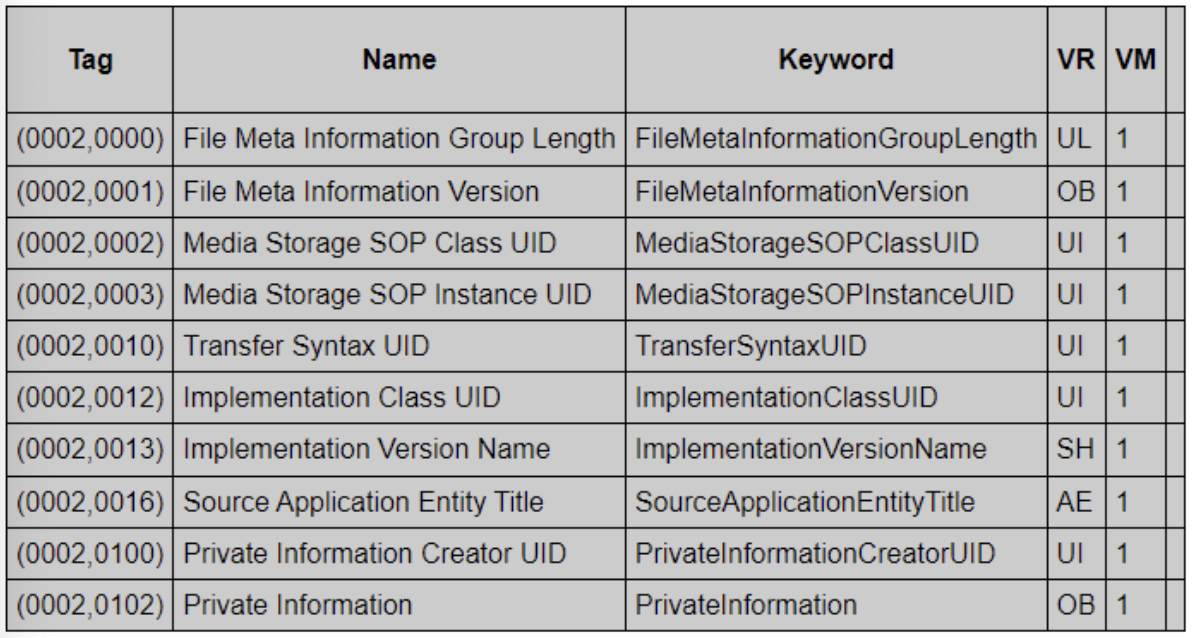

B. Information Object

Information Object는 Data Element로 구성되어 있음. 또한, Data Set은 IOD(Information Object Definition)형식을 따르는데 IOD는 Entity-relationship model을 중심으로 아래의 그림과 같이 information entities, modules, attributes로 구성되어 있음.

다음은 IOD형식을 따르는 구조애 대한 전반적인 설명을 나타내는 그림.
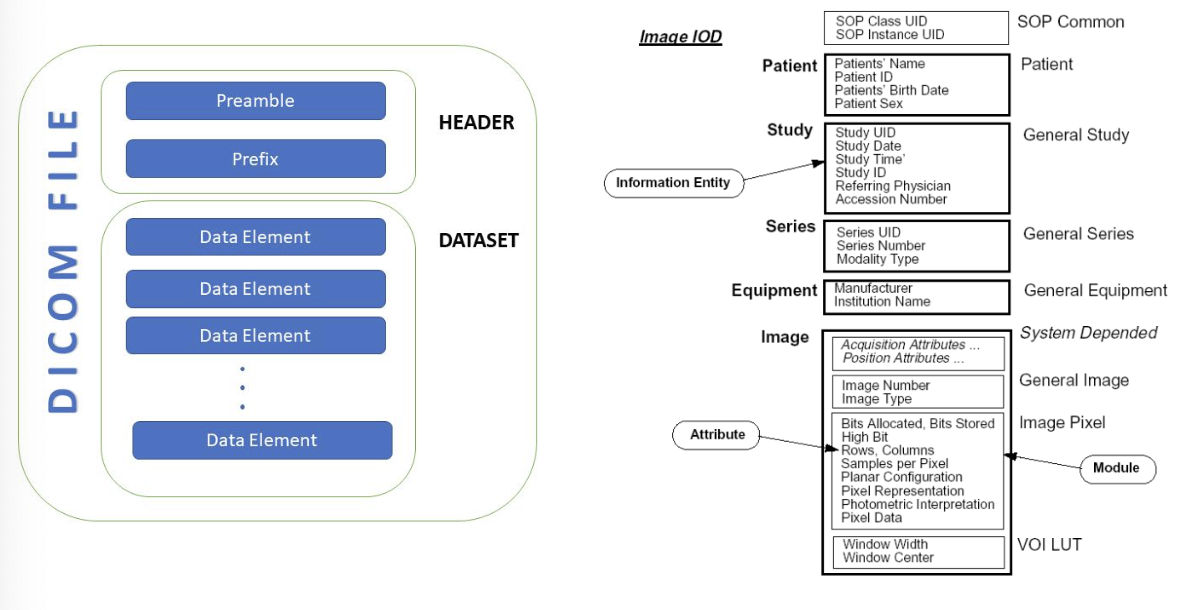

추가적으로 IOD는 정보교환을 위한 정보의 내용과 형식을 표준화하는데 사용되며 구조적으로 IOD는 IE(Information Entity) -> Module -> attributes 들로 구성

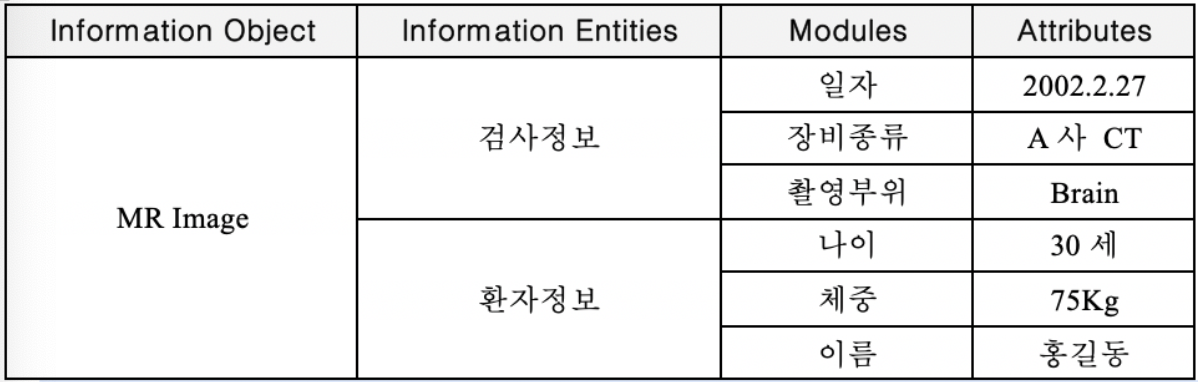

cf) MR 영상을 위한 MR IOD는 환자정보 IE, 검사정보 IE, 시리즈정보 IE, 영상정보 IE 등으로 구성되어 있고, 영상정보 IE는 다시 영사의 일반적인 내용을 다루는 모듈과 MR 영상의 특수한 특성에 대해 다루는 모듈로 구성되어 있고, 각각의 모듈에는 개별적인 세부 속성들이 정의되어있음.

예를들어, MRI(=MR Image)라는 것을 하나의 객체(Information Object)라고 설정하고, 해당 객체를 여러 entity를 이용해 표현한다. 환자정보를 나타내는 entity, 검사정보를 나타내는 entity, 이미지정보를 다나태는 entity 등이 있음.

DICOM 파일 구조는 환자 분들의 개인 신상정보(ex 나이, 성별 등), 수행한 검사 정보(MR인지 CT인지 등), 영상의 정보에 대해 규정하기 위해 필요한 다양한 속성들이 존재한다. 이는 attribute라고 부르며 수천개가 존재.

다음은 attribute를 구성하는 요소
- Attribute Name: 속성에 대한 이름
- Tag: 시스템이 해당 속상을 식별하는 용도로 사용하는 4byte의 값
- Type: 속성 입력의 필수/선택 여부 관련 정보
- Attribute description: 해당 속성에 대한 상세한 설명

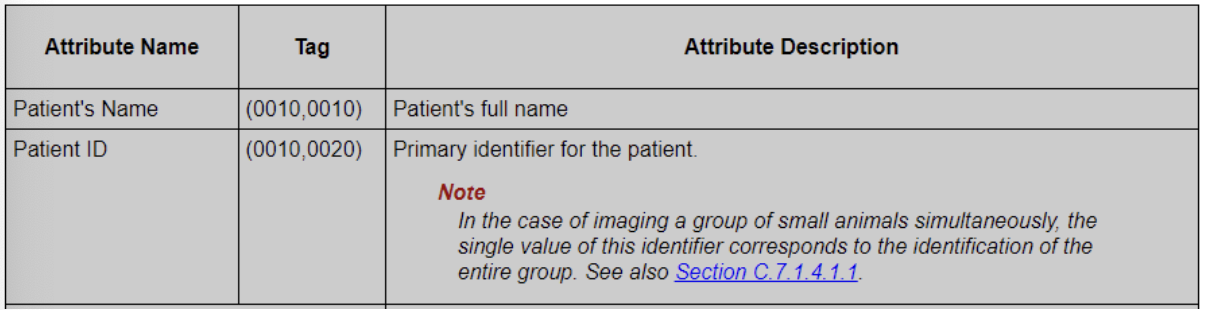

위 그림은 attribute를 설명하기 위한 그림이라면 아래는 DICOM에 실질적으로 저장된 형태를 나타냄.

attribute는 Tag와 VR(Value Representation)과 Value Length, Value Field(실질적인 값)으로 구성된다.

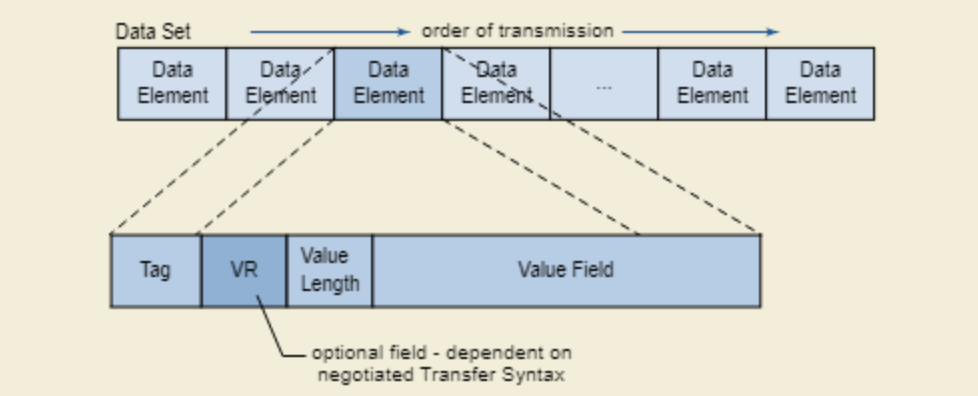

DICOM에서 실제 Image데이터는 Image entity -> Image Pixel moudle -> PixelData attribute로 접근하면된다.